<a href="https://colab.research.google.com/github/ahmadAria001/PCVK_GANJIL_2024/blob/main/Week_3_PCVK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/drive/1JfAL2Fu1DR6AXrPqWA7P636mzVFFS2uZ?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Praktikum 3 - Operasi Citra Sederhana - Linier Brightness, Contrast,Inverse, Logarithmic Brightness, dan Grayscale Image
##### Nama  : Ahmad Aria Adi Saputra
##### Kelas : TI-3F
##### NIM : 2241720247

## **Praktikum**

### **1. Import Drive**

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **2. Import Library**

In [19]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

assets_dir = '/content/drive/MyDrive/Colab Notebooks/PCVK/Images/'

### **3. Transformasi Linear Brightness**

Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan: 34


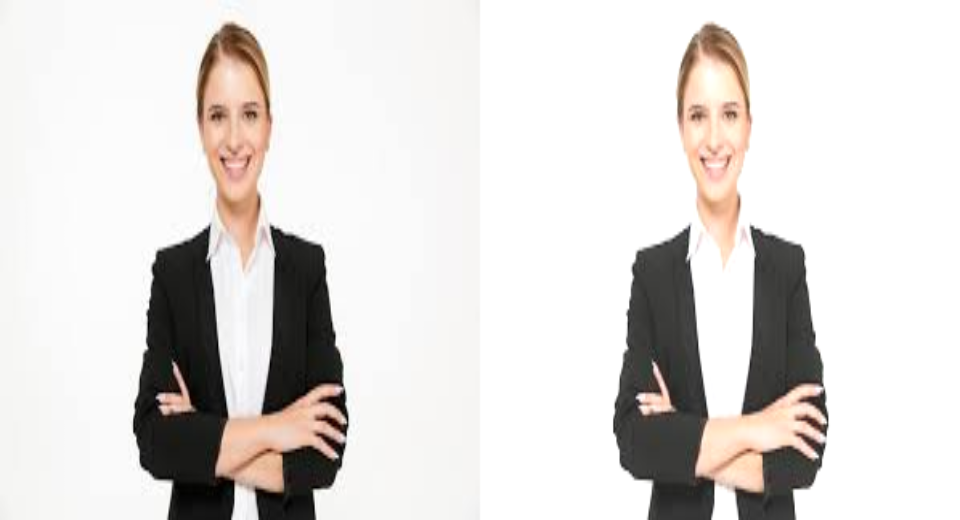

In [20]:
print('Mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread(assets_dir + 'female.jpg')
brightness_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

final_frame = cv.hconcat((original, brightness_image))
# example resize img
resized_final_frame = cv.resize(final_frame, (960, 520))

# resized
cv2_imshow(resized_final_frame)

## **Tugas**

### **Tugas 1 - Inverse Gambar**

Invert Without Library

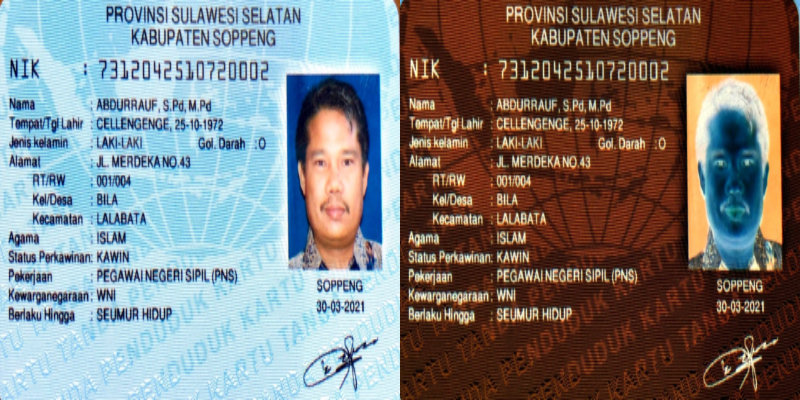

In [21]:
ktp_ori = cv.imread(assets_dir + 'KTP.png')

inverse = 255 - ktp_ori

frame = cv.hconcat((ktp_ori,inverse))
resize_frame = cv.resize(frame, (800, 400))
cv2_imshow(resize_frame)

Invert Using CV Library

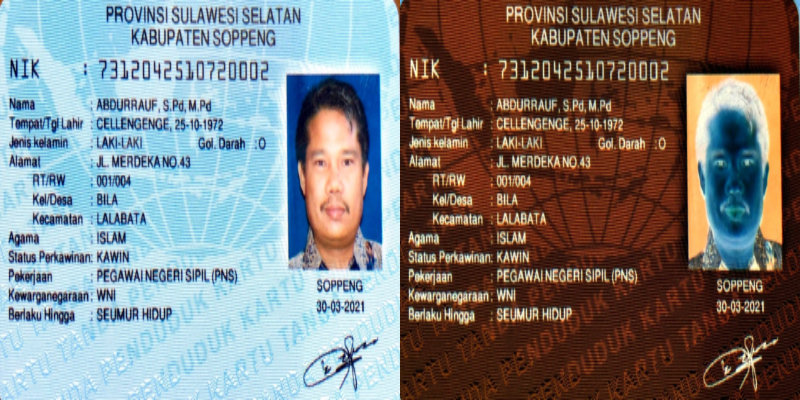

In [22]:
ktp_ori = cv.imread(assets_dir + 'KTP.png')

# Inverse cv.bitwise_not
inverse = cv.bitwise_not(ktp_ori)

frame = cv.hconcat([ktp_ori, inverse])
resize_frame = cv.resize(frame, (800, 400))
cv2_imshow(resize_frame)

Invert Using Numpy Library

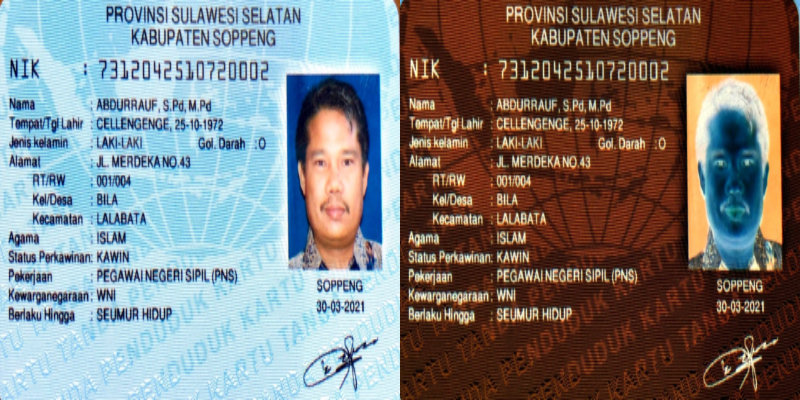

In [23]:
ktp_ori = cv.imread(assets_dir + '/KTP.png')

# Inverse numpy
inverse = np.invert(ktp_ori)

frame = cv.hconcat([ktp_ori, inverse])
resize_frame = cv.resize(frame, (800, 400))

cv2_imshow(resize_frame)

Invert OpenCV Transformation

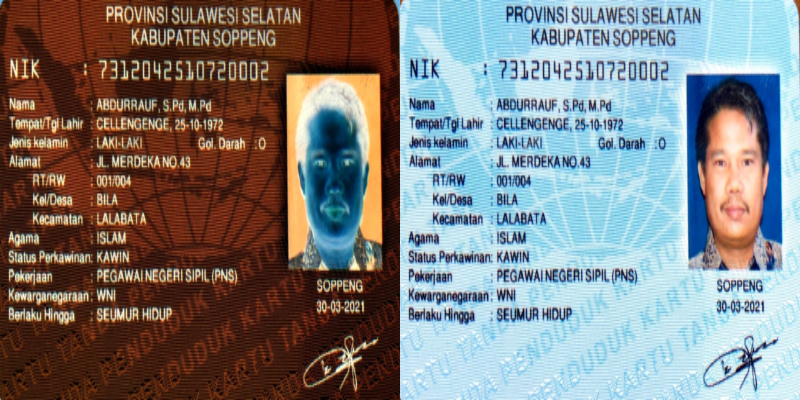

In [24]:
ktp_ori = cv.imread(assets_dir + 'KTP.png')

# Inverse scaling (-1, 1, 255)
inverse = cv.convertScaleAbs(ktp_ori, alpha=-1, beta=255)
inverter = cv.convertScaleAbs(inverse, alpha=1, beta=-255)

frame = cv.hconcat([inverse, inverter])
resize_frame = cv.resize(frame, (800, 400))

cv2_imshow(resize_frame)

### **Tugas 2 - Transformasi contrast**

Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan: 23
Masukkan nilai contrast: 41


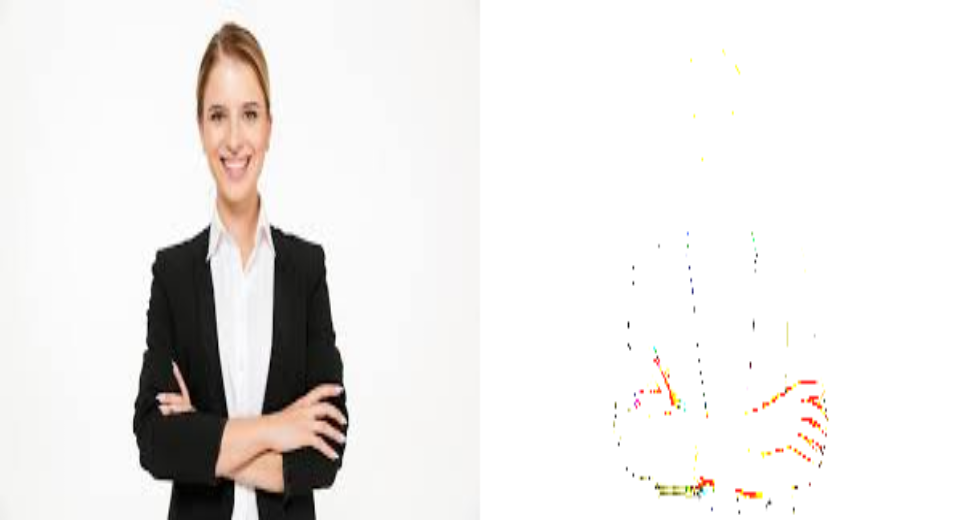

In [25]:
print('Mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

try:
  contrast = int(input('Masukkan nilai contrast: '))
except ValueError:
  print('Error, not a number')

original = cv.imread(assets_dir + 'female.jpg')
contrast_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      contrast_image[y,x,c] = np.clip(contrast * original[y,x,c] + brightness, 0, 255)

final_frame = cv.hconcat((original, contrast_image))
resized_final_frame = cv.resize(final_frame, (960, 520))

cv2_imshow(resized_final_frame)

### **Tugas 3 - Transformasi Log**

Masukkan nilai brightness (1-100): 23


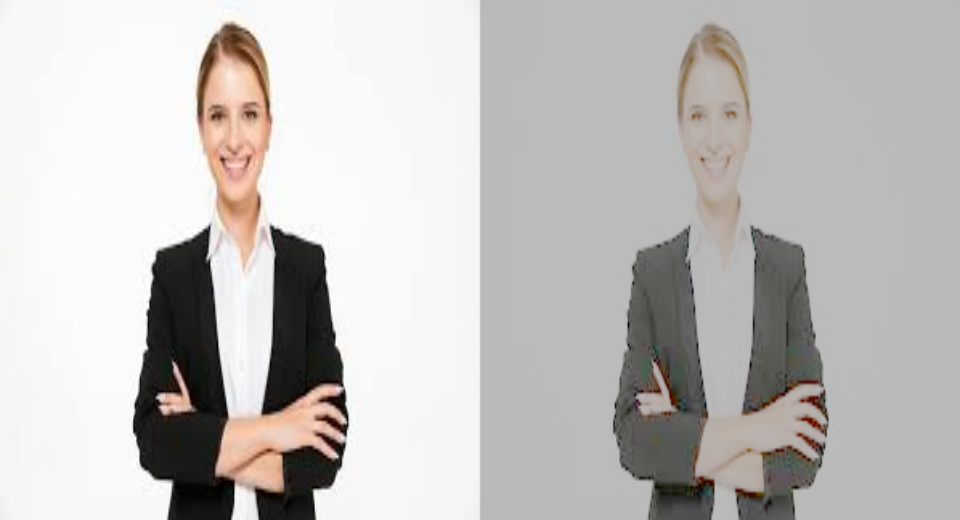

In [26]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

assets_dir = '/content/drive/MyDrive/Colab Notebooks/PCVK/Images/'

original = cv2.imread(assets_dir + 'female.jpg')
if original is None:
    print("Gambar tidak ditemukan. Pastikan path sudah benar.")
    exit()

try:
    brightness = float(input('Masukkan nilai brightness (1-100): '))
    if brightness < 1 or brightness > 100:
        raise ValueError("Brightness harus berada dalam rentang 1-100.")
except ValueError as e:
    print(f"Error: {e}")
    brightness = 50  # Default value

# Convert to float to prevent overflow
original_float = original.astype(np.float32)

# Const c for logarithmic
c = 255 / np.log(1 + np.max(original_float))

# logarithmic with brightness adjustment
# Normalize brightness input so the value will between 0-1 and then multiply with image
brightness_normalized = brightness / 100
log_image = c * np.log1p(original_float * brightness_normalized)

# Normalize value to 0-255 then convert to uint8
log_image = np.clip(log_image, 0, 255).astype(np.uint8)

# Unify original and mdified image
final_frame = cv.hconcat((original, log_image))
# resize
resized_final_frame = cv.resize(final_frame, (960, 520))
cv2_imshow(resized_final_frame)

### **Tugas 4 - Tranformasi Grayscale**

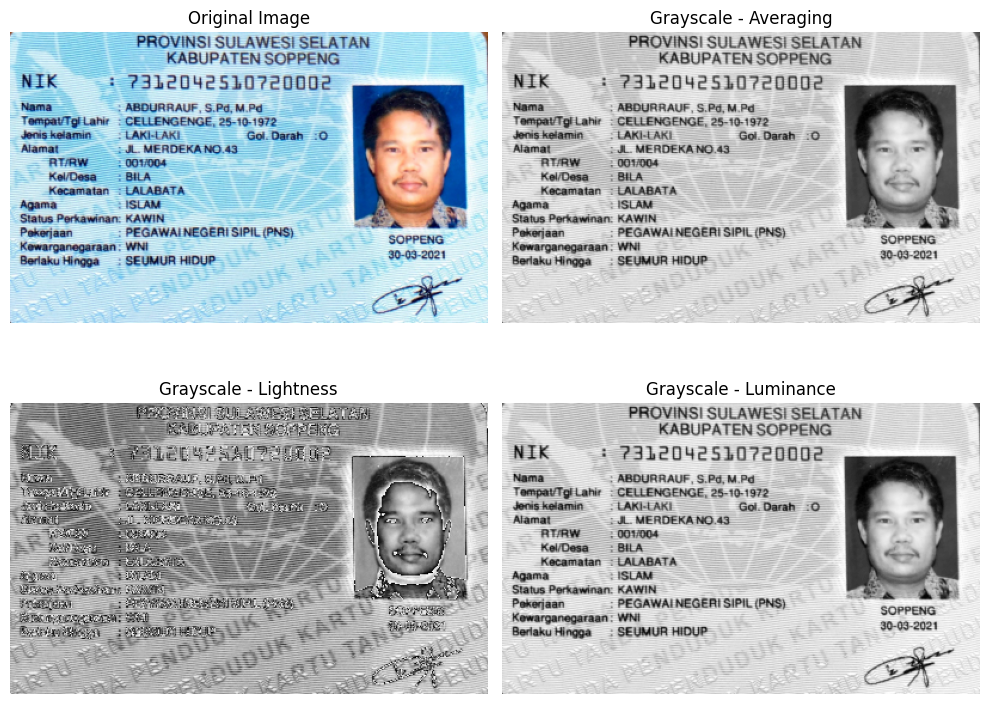

In [27]:
# Load the image
original = cv.imread(assets_dir + 'KTP.png')

# Convert to RGB (OpenCV loads images in BGR by default)
image_rgb = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)

# Grayscale conversion functions
def grayscale_average(img):
    return np.mean(img, axis=2).astype(np.uint8)

def grayscale_lightness(img):
    return (np.max(img, axis=2) + np.min(img, axis=2)) // 2

def grayscale_luminance(img):
    return (0.21 * img[:, :, 0] + 0.72 * img[:, :, 1] + 0.07 * img[:, :, 2]).astype(np.uint8)

# Apply the different grayscale methods
gray_average = grayscale_average(image_rgb)
gray_lightness = grayscale_lightness(image_rgb)
gray_luminance = grayscale_luminance(image_rgb)

# Plotting the results
plt.figure(figsize=(10, 8))

# Original image
plt.subplot(2, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

# Grayscale (Averaging)
plt.subplot(2, 2, 2)
plt.imshow(gray_average, cmap='gray')
plt.title('Grayscale - Averaging')
plt.axis('off')

# Grayscale (Lightness)
plt.subplot(2, 2, 3)
plt.imshow(gray_lightness, cmap='gray')
plt.title('Grayscale - Lightness')
plt.axis('off')

# Grayscale (Luminance)
plt.subplot(2, 2, 4)
plt.imshow(gray_luminance, cmap='gray')
plt.title('Grayscale - Luminance')
plt.axis('off')

plt.tight_layout()
plt.show()

### **Tugas 5 - Masking certain area**

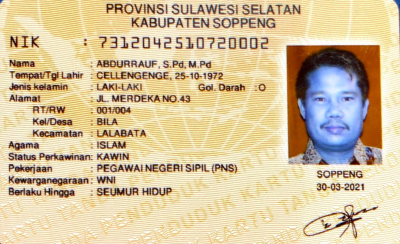

In [28]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

assets_dir = '/content/drive/MyDrive/Colab Notebooks/PCVK/Images/'

img = cv2.imread(assets_dir + 'KTP.png')

# Convert BGR to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Threshold blue
lower_blue = np.array([0, 0, 150])  # Filter darker blue
upper_blue = np.array([100, 100, 255])  # Filter light blue

# Mask for blue
mask_blue = cv2.inRange(img_rgb, lower_blue, upper_blue)

# Convert mask to grayscale
gray_mask = cv2.cvtColor(mask_blue, cv2.COLOR_GRAY2BGR)

# Join blue and grayscale
blue_only = cv2.bitwise_and(img_rgb, gray_mask)
gray_only = cv2.bitwise_and(img_rgb, cv2.bitwise_not(gray_mask))

# Unify with original
result = cv2.add(blue_only, gray_only)
cv2_imshow(result)

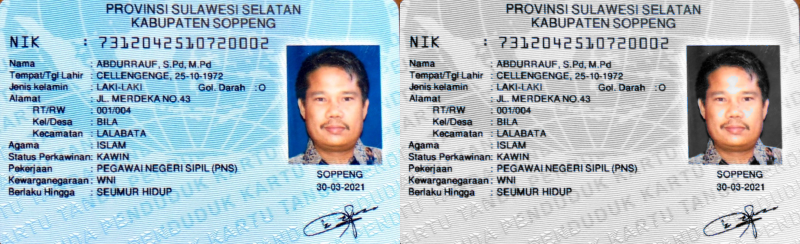

In [32]:
# Filter certain color and convert the others into grayscale.
red_ktp_color = ktp_ori.copy()
lower_red = np.array([0, 0, 80])
upper_red = np.array([200, 255, 255])

mask = cv.inRange(ktp_ori, lower_red, upper_red)

# Grayscale from original
gray = ktp_ori.copy()

for y in range(ktp_ori.shape[0]):
  for x in range(ktp_ori.shape[1]):
    r = ktp_ori[y,x,2]
    g = ktp_ori[y,x,1]
    b = ktp_ori[y,x,0]
    gray[y,x] = 0.21 * r + 0.72 * g + 0.07 * b

# Unify red with grayscale
red_ktp_color = np.where(mask[:, :,np.newaxis] == 255, red_ktp_color, gray)

# Gabungkan gambar asli dan hasil untuk perbandingan
final_frame = cv.hconcat([ktp_ori, red_ktp_color])
cv2_imshow(final_frame)

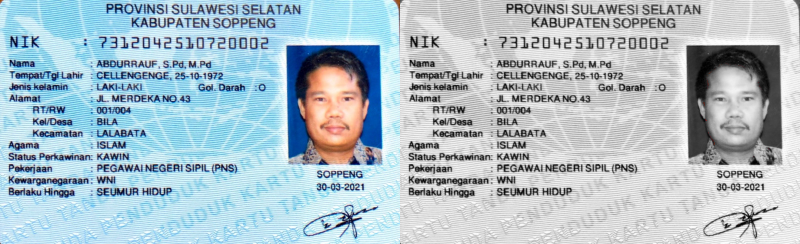

In [36]:
ktp_ori = cv2.imread(assets_dir + 'KTP.png')

ktp_mask = ktp_ori.copy()
lower_blue = np.array([0, 0, 50])
upper_blue = np.array([50, 50, 150])

mask = cv.inRange(ktp_ori, lower_blue, upper_blue)

gray = ktp_ori.copy()

for y in range(ktp_ori.shape[0]):
  for x in range(ktp_ori.shape[1]):
    r = ktp_ori[y,x,2]
    g = ktp_ori[y,x,1]
    b = ktp_ori[y,x,0]
    gray[y,x] = 0.21 * r + 0.72 * g + 0.07 * b

ktp_mask = np.where(mask[:, :,np.newaxis] == 255, ktp_mask, gray)

final_frame = cv.hconcat([ktp_ori, ktp_mask])
cv2_imshow(final_frame)

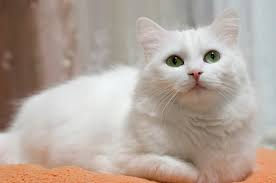

In [38]:
original = cv.imread(assets_dir + 'white_cat.png')
cv2_imshow(original)

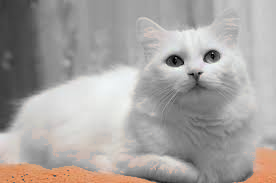

In [39]:
# Define color range RGB
lower_bound = np.array([0, 100, 200], dtype=np.uint8)
upper_bound = np.array([255, 255, 255], dtype=np.uint8)

# Mask for blue color range
color_mask = cv2.inRange(original, lower_bound, upper_bound)

# Gray image
gray_image = cv2.cvtColor(original, cv2.COLOR_RGB2GRAY)
gray_image = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2RGB)

image = np.zeros_like(original)
image[color_mask != 0] = original[color_mask != 0]
image[color_mask == 0] = gray_image[color_mask == 0]

cv2_imshow(image)